In [2]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [3]:
#Open data
df = pd.read_csv("Resources/roi_decimal.csv")
df

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
0,Madea's Family Reunion,USA,24-02-2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,6.3321,Feb,2006
1,Krrish,India,23-06-2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,3.2431,Jun,2006
2,End of the Spear,USA,20-01-2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,1.1924,Jan,2006
3,A Prairie Home Companion,USA,09-06-2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,2.6716,Jun,2006
4,Saw III,"Canada, USA",27-10-2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,16.3877,Oct,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16-11-2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,1.8467,Nov,2018
1822,Instant Family,USA,16-11-2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,2.3852,Nov,2018
1823,The Mule,"USA, Canada",14-12-2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,3.0238,Dec,2018
1824,Creed II,USA,21-11-2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,4.2531,Nov,2018


In [4]:
#Create Monthly ROI frames
jan_df = df.loc[df["Month"] == "Jan"]
feb_df = df.loc[df["Month"] == "Feb"]
mar_df = df.loc[df["Month"] == "Mar"]
apr_df = df.loc[df["Month"] == "Apr"]
may_df = df.loc[df["Month"] == "May"]
jun_df = df.loc[df["Month"] == "Jun"]
jul_df = df.loc[df["Month"] == "Jul"]
aug_df = df.loc[df["Month"] == "Aug"]
sep_df = df.loc[df["Month"] == "Sep"]
oct_df = df.loc[df["Month"] == "Oct"]
nov_df = df.loc[df["Month"] == "Nov"]
dec_df = df.loc[df["Month"] == "Dec"]

jan_df

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
2,End of the Spear,USA,20-01-2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,1.1924,Jan,2006
30,Pan's Labyrinth,"Mexico, Spain",19-01-2007,8.2,98.0,95%,16000000,37634615,49406954,R,Horror,87041569,5.4401,Jan,2007
45,The Painted Veil,"China, USA, Canada",19-01-2007,7.5,69.0,74%,19400000,8060487,7058308,PG-13,Drama,15118795,0.7793,Jan,2007
61,BloodRayne,"Germany, USA",06-01-2006,2.9,18.0,4%,25000000,2405420,1306213,R,Action,3711633,0.1485,Jan,2006
64,Nanny McPhee,"USA, UK, France",27-01-2006,6.5,59.0,73%,25000000,47279279,81466299,PG,Adventure,128745578,5.1498,Jan,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,The Upside,USA,11-01-2019,5.1,35.0,16%,37500000,103386274,10800000,PG-13,Comedy,114186274,3.0450,Jan,2019
1761,The Post,"USA, UK",12-01-2018,6.8,79.0,33%,50000000,81903458,97845422,PG-13,Drama,179748880,3.5950,Jan,2018
1771,Maze Runner: The Death Cure,USA,26-01-2018,6.0,30.0,87%,61000000,58032443,207846093,PG-13,Thriller/Suspense,265878536,4.3587,Jan,2018
1811,Nobody's Fool,USA,13-01-1995,8.2,69.0,65%,19000000,31713110,876383,R,Drama,32589493,1.7152,Jan,1995


In [5]:
#Successful ROI Frame
sf = pd.read_csv("Resources/roi_success.csv")
sf

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
0,Madea's Family Reunion,USA,24-02-2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,6.3321,Feb,2006
1,Krrish,India,23-06-2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,3.2431,Jun,2006
2,Saw III,"Canada, USA",27-10-2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,16.3877,Oct,2006
3,Employee of the Month,USA,06-10-2006,5.5,36.0,20%,10000000,28444855,9920000,PG-13,Comedy,38364855,3.8365,Oct,2006
4,Kabhi Alvida Naa Kehna,India,11-08-2006,6.1,NaN,58%,10750000,3275443,29300000,Not Rated,Drama,32575443,3.0303,Aug,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Green Book,"USA, China",16-11-2018,6.1,38.0,97%,28900000,77301246,112039078,PG-13,Comedy,189340324,6.5516,Nov,2018
656,Crazy Rich Asians,USA,15-08-2018,6.9,84.0,84%,30000000,174532921,63566790,PG-13,Romantic Comedy,238099711,7.9367,Aug,2018
657,The Mule,"USA, Canada",14-12-2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,3.0238,Dec,2018
658,Creed II,USA,21-11-2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,4.2531,Nov,2018


In [6]:
##Create Monthly Successful ROI frames ROI > 2.77
jan_sf = sf.loc[df["Month"] == "Jan"]
feb_sf = sf.loc[df["Month"] == "Feb"]
mar_sf = sf.loc[df["Month"] == "Mar"]
apr_sf = sf.loc[df["Month"] == "Apr"]
may_sf = sf.loc[df["Month"] == "May"]
jun_sf = sf.loc[df["Month"] == "Jun"]
jul_sf = sf.loc[df["Month"] == "Jul"]
aug_sf = sf.loc[df["Month"] == "Aug"]
sep_sf = sf.loc[df["Month"] == "Sep"]
oct_sf = sf.loc[df["Month"] == "Oct"]
nov_sf = sf.loc[df["Month"] == "Nov"]
dec_sf = sf.loc[df["Month"] == "Dec"]
jan_sf

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
2,Saw III,"Canada, USA",27-10-2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,16.3877,Oct,2006
30,Music and Lyrics,USA,14-02-2007,6.5,59.0,63%,40000000,50572589,95624296,PG-13,Romantic Comedy,146196885,3.6549,Feb,2007
45,This Christmas,USA,21-11-2007,6.3,63.0,55%,13000000,49121934,611611,PG-13,Drama,49733545,3.8257,Nov,2007
61,Into the Wild,USA,19-10-2007,8.1,73.0,83%,20000000,18354356,38468604,R,Drama,56822960,2.8411,Oct,2007
64,Epic Movie,USA,26-01-2007,2.4,17.0,2%,20000000,39739367,47119211,PG-13,Comedy,86858578,4.3429,Jan,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,"Three Billboards Outside Ebbing, Missouri","UK, USA",01-12-2017,6.1,58.0,84%,12000000,54513740,105678175,R,Black Comedy,160191915,13.3493,Dec,2017
604,The First Purge,USA,04-07-2018,5.1,36.0,67%,13000000,69488745,67128560,R,Horror,136617305,10.5090,Jul,2018
606,A Quiet Place,USA,06-04-2018,5.8,32.0,56%,17000000,188024361,146497933,PG-13,Horror,334522294,19.6778,Apr,2018
638,Rampage,USA,13-04-2018,7.4,82.0,40%,120000000,101028233,327028047,PG-13,Action,428056280,3.5671,Apr,2018


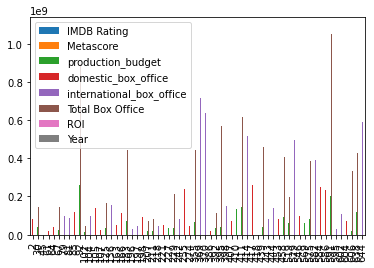

In [7]:
jan_sf.plot.bar(x=None, y=None,)

In [8]:
len(jan_df.loc[jan_df["ROI"] >= 2.77])

62

In [9]:
len(jan_df)

164

In [10]:
#Testing to find percentage of successful movies by using "Successful Movies / Total Movies" for each month.
len(jan_df.loc[jan_df["ROI"] >= 2.77]) / len(jan_df)

0.3780487804878049

In [11]:
#List of each month
df['Month'].unique()

array(['Feb', 'Jun', 'Jan', 'Oct', 'Nov', 'Dec', 'Aug', 'Mar', 'Sep',
       'May', 'Apr', 'Jul'], dtype=object)

In [21]:
#Decimal percentage of successful movies, Successful ROI = 277%
sroi = 2.77
data = {'Month':  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',],
        'Successful (ROI>2.77 in Month)': [len(jan_df.loc[jan_df["ROI"] >= sroi]) / len(jan_df),
                                          len(feb_df.loc[feb_df["ROI"] >= sroi]) / len(feb_df),
                                          len(mar_df.loc[mar_df["ROI"] >= sroi]) / len(mar_df),
                                          len(apr_df.loc[apr_df["ROI"] >= sroi]) / len(apr_df),
                                          len(may_df.loc[may_df["ROI"] >= sroi]) / len(may_df),
                                          len(jun_df.loc[jun_df["ROI"] >= sroi]) / len(jun_df),
                                          len(jul_df.loc[jul_df["ROI"] >= sroi]) / len(jul_df),
                                          len(aug_df.loc[aug_df["ROI"] >= sroi]) / len(aug_df),
                                          len(sep_df.loc[sep_df["ROI"] >= sroi]) / len(sep_df),
                                          len(oct_df.loc[oct_df["ROI"] >= sroi]) / len(oct_df),
                                          len(nov_df.loc[nov_df["ROI"] >= sroi]) / len(nov_df),
                                          len(dec_df.loc[dec_df["ROI"] >= sroi]) / len(dec_df),]}

chartsf = pd.DataFrame (data, columns = [ 'Month', 'Successful (ROI>2.77 in Month)'], index= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',])
chartsf


,Month,Successful (ROI>2.77 in Month)
Jan,Jan,0.378049
Feb,Feb,0.388489
Mar,Mar,0.296970
Apr,Apr,0.311594
May,May,0.403361
Jul,Jul,0.432432
Jun,Jun,0.465278
Aug,Aug,0.313333
Sep,Sep,0.238095
Oct,Oct,0.289617


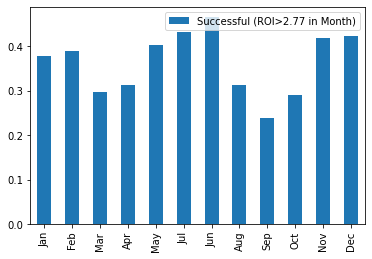

In [22]:
#2.77 ROI Chart
chartsf.plot.bar(x=None, y=1)

In [62]:
#Decimal percentage of successful movies, Successful ROI = 344%
sroi = 3.73
data = {'Month':  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',],
        'Successful (ROI>3.44 in Month)': [len(jan_df.loc[jan_df["ROI"] >= sroi]) / len(jan_df),
                                          len(feb_df.loc[feb_df["ROI"] >= sroi]) / len(feb_df),
                                          len(mar_df.loc[mar_df["ROI"] >= sroi]) / len(mar_df),
                                          len(apr_df.loc[apr_df["ROI"] >= sroi]) / len(apr_df),
                                          len(may_df.loc[may_df["ROI"] >= sroi]) / len(may_df),
                                          len(jun_df.loc[jun_df["ROI"] >= sroi]) / len(jun_df),
                                          len(jul_df.loc[jul_df["ROI"] >= sroi]) / len(jul_df),
                                          len(aug_df.loc[aug_df["ROI"] >= sroi]) / len(aug_df),
                                          len(sep_df.loc[sep_df["ROI"] >= sroi]) / len(sep_df),
                                          len(oct_df.loc[oct_df["ROI"] >= sroi]) / len(oct_df),
                                          len(nov_df.loc[nov_df["ROI"] >= sroi]) / len(nov_df),
                                          len(dec_df.loc[dec_df["ROI"] >= sroi]) / len(dec_df),]}

chartssf = pd.DataFrame (data, columns = [ 'Month', 'Successful (ROI>3.44 in Month)'], index= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',])
chartssf

,Month,Successful (ROI>3.44 in Month)
Jan,Jan,0.250000
Feb,Feb,0.273381
Mar,Mar,0.187879
Apr,Apr,0.181159
May,May,0.243697
Jul,Jul,0.270270
Jun,Jun,0.326389
Aug,Aug,0.226667
Sep,Sep,0.149660
Oct,Oct,0.191257


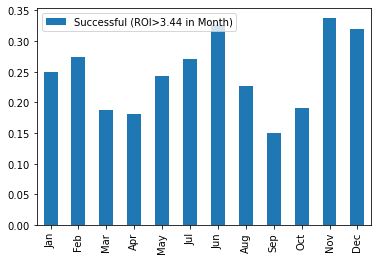

In [40]:
#3.73 ROI Chart
chartssf.plot.bar(x=None, y=1)

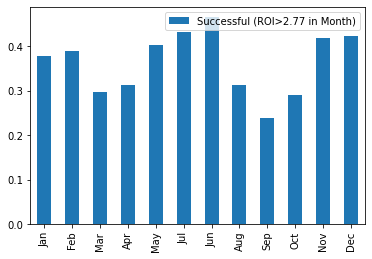

In [41]:
#2.77 ROI chart
chartsf.plot.bar(x=None, y=1)

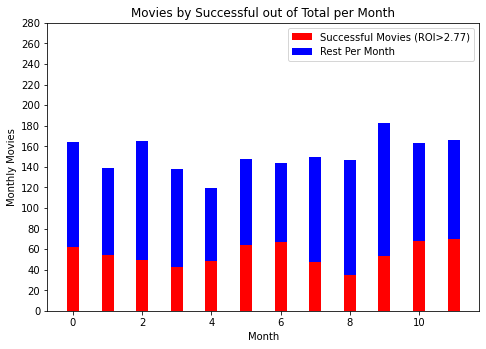

In [42]:
#Stacked Bar Chart of Successfull Movies ROI<2.77
sroi = 2.77
N = 12
Successful = ([len(jan_df.loc[jan_df["ROI"] >= sroi]),
               len(feb_df.loc[feb_df["ROI"] >= sroi]),
               len(mar_df.loc[mar_df["ROI"] >= sroi]),
               len(apr_df.loc[apr_df["ROI"] >= sroi]),
               len(may_df.loc[may_df["ROI"] >= sroi]),
               len(jun_df.loc[jun_df["ROI"] >= sroi]),
               len(jul_df.loc[jul_df["ROI"] >= sroi]),
               len(aug_df.loc[aug_df["ROI"] >= sroi]),
               len(sep_df.loc[sep_df["ROI"] >= sroi]),
               len(oct_df.loc[oct_df["ROI"] >= sroi]),
               len(nov_df.loc[nov_df["ROI"] >= sroi]),
               len(dec_df.loc[dec_df["ROI"] >= sroi])])
Rest =     ([len(jan_df.loc[jan_df["ROI"] <= sroi]),
               len(feb_df.loc[feb_df["ROI"] <= sroi]),
               len(mar_df.loc[mar_df["ROI"] <= sroi]),
               len(apr_df.loc[apr_df["ROI"] <= sroi]),
               len(may_df.loc[may_df["ROI"] <= sroi]),
               len(jun_df.loc[jun_df["ROI"] <= sroi]),
               len(jul_df.loc[jul_df["ROI"] <= sroi]),
               len(aug_df.loc[aug_df["ROI"] <= sroi]),
               len(sep_df.loc[sep_df["ROI"] <= sroi]),
               len(oct_df.loc[oct_df["ROI"] <= sroi]),
               len(nov_df.loc[nov_df["ROI"] <= sroi]),
               len(dec_df.loc[dec_df["ROI"] <= sroi])])

ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, Successful, width, color='r')
ax.bar(ind, Rest, width,bottom=Successful, color='b')
ax.set_ylabel('Monthly Movies')
ax.set_xlabel('Month')
ax.set_title('Movies by Successful out of Total per Month')
ax.set_yticks(np.arange(0, 300, 20))
ax.legend(labels=['Successful Movies (ROI>2.77)', 'Rest Per Month'])
plt.show()

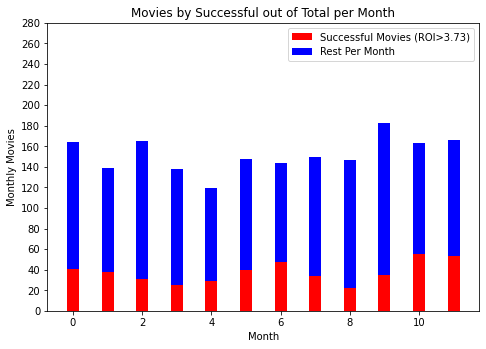

In [44]:
#Stacked Bar Chart of Successfull Movies ROI<2.77
sroi = 3.73
N = 12
Successful = ([len(jan_df.loc[jan_df["ROI"] >= sroi]),
               len(feb_df.loc[feb_df["ROI"] >= sroi]),
               len(mar_df.loc[mar_df["ROI"] >= sroi]),
               len(apr_df.loc[apr_df["ROI"] >= sroi]),
               len(may_df.loc[may_df["ROI"] >= sroi]),
               len(jun_df.loc[jun_df["ROI"] >= sroi]),
               len(jul_df.loc[jul_df["ROI"] >= sroi]),
               len(aug_df.loc[aug_df["ROI"] >= sroi]),
               len(sep_df.loc[sep_df["ROI"] >= sroi]),
               len(oct_df.loc[oct_df["ROI"] >= sroi]),
               len(nov_df.loc[nov_df["ROI"] >= sroi]),
               len(dec_df.loc[dec_df["ROI"] >= sroi])])
Rest =     ([len(jan_df.loc[jan_df["ROI"] <= sroi]),
               len(feb_df.loc[feb_df["ROI"] <= sroi]),
               len(mar_df.loc[mar_df["ROI"] <= sroi]),
               len(apr_df.loc[apr_df["ROI"] <= sroi]),
               len(may_df.loc[may_df["ROI"] <= sroi]),
               len(jun_df.loc[jun_df["ROI"] <= sroi]),
               len(jul_df.loc[jul_df["ROI"] <= sroi]),
               len(aug_df.loc[aug_df["ROI"] <= sroi]),
               len(sep_df.loc[sep_df["ROI"] <= sroi]),
               len(oct_df.loc[oct_df["ROI"] <= sroi]),
               len(nov_df.loc[nov_df["ROI"] <= sroi]),
               len(dec_df.loc[dec_df["ROI"] <= sroi])])

ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, Successful, width, color='r')
ax.bar(ind, Rest, width,bottom=Successful, color='b')
ax.set_ylabel('Monthly Movies')
ax.set_xlabel('Month')
ax.set_title('Movies by Successful out of Total per Month')
ax.set_yticks(np.arange(0, 300, 20))
ax.legend(labels=['Successful Movies (ROI>3.73)', 'Rest Per Month'])
plt.show()

In [59]:
diff_list =   [(len(jan_df.loc[jan_df["ROI"] >= ssroi])) - (len(jan_df.loc[jan_df["ROI"] >= sroi])),
    (len(feb_df.loc[feb_df["ROI"] >= ssroi])) - (len(feb_df.loc[feb_df["ROI"] >= sroi])),
    (len(mar_df.loc[mar_df["ROI"] >= ssroi])) - (len(mar_df.loc[mar_df["ROI"] >= sroi])),
    (len(apr_df.loc[apr_df["ROI"] >= ssroi])) - (len(apr_df.loc[apr_df["ROI"] >= sroi])),
    (len(may_df.loc[may_df["ROI"] >= ssroi])) - (len(may_df.loc[may_df["ROI"] >= sroi])),
    (len(jun_df.loc[jun_df["ROI"] >= ssroi])) - (len(jun_df.loc[jun_df["ROI"] >= sroi])),
    (len(jul_df.loc[jul_df["ROI"] >= ssroi])) - (len(jul_df.loc[jul_df["ROI"] >= sroi])),
    (len(aug_df.loc[aug_df["ROI"] >= ssroi])) - (len(aug_df.loc[aug_df["ROI"] >= sroi])),
    (len(sep_df.loc[sep_df["ROI"] >= ssroi])) - (len(sep_df.loc[sep_df["ROI"] >= sroi])),
    (len(oct_df.loc[oct_df["ROI"] >= ssroi])) - (len(oct_df.loc[oct_df["ROI"] >= sroi])),
    (len(nov_df.loc[nov_df["ROI"] >= ssroi])) - (len(nov_df.loc[nov_df["ROI"] >= sroi])),
    (len(dec_df.loc[dec_df["ROI"] >= ssroi])) - (len(dec_df.loc[dec_df["ROI"] >= sroi]))]
diff_list

[21, 16, 18, 18, 19, 24, 20, 13, 13, 18, 13, 17]

In [65]:
data = {'Month':  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',],
        'Difference between months with each Successful ROI Param': diff_list

chartdiff =   pd.DataFrame (data, columns = [ 'Month', 'Difference between months with each Successful ROI Param' ], index = data)
chartdiff

SyntaxError: invalid syntax (<ipython-input-65-9905164b87fb>, line 4)

In [68]:
datadf = {'Month':  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jul', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',],
        'Difference between months with each Successful ROI Param': diff_list
    
datadf

SyntaxError: invalid syntax (<ipython-input-68-9d889614118e>, line 4)